<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab10: MNIST**

**In this lab, we are going to learn how to train various image processing systems with different activation functions and structures.**

# **Activation Functions**

**Activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.**

**If a neural network is working without activation functions, every neuron will only be performing a linear transformation on the inputs using the weights and biases.**

**Let's look at examples of activation functions.**

# **Sigmoid**

**Sigmoid function compresses inputs to the range of 0 to 1.**

**The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0, as shown below.**

<div>
  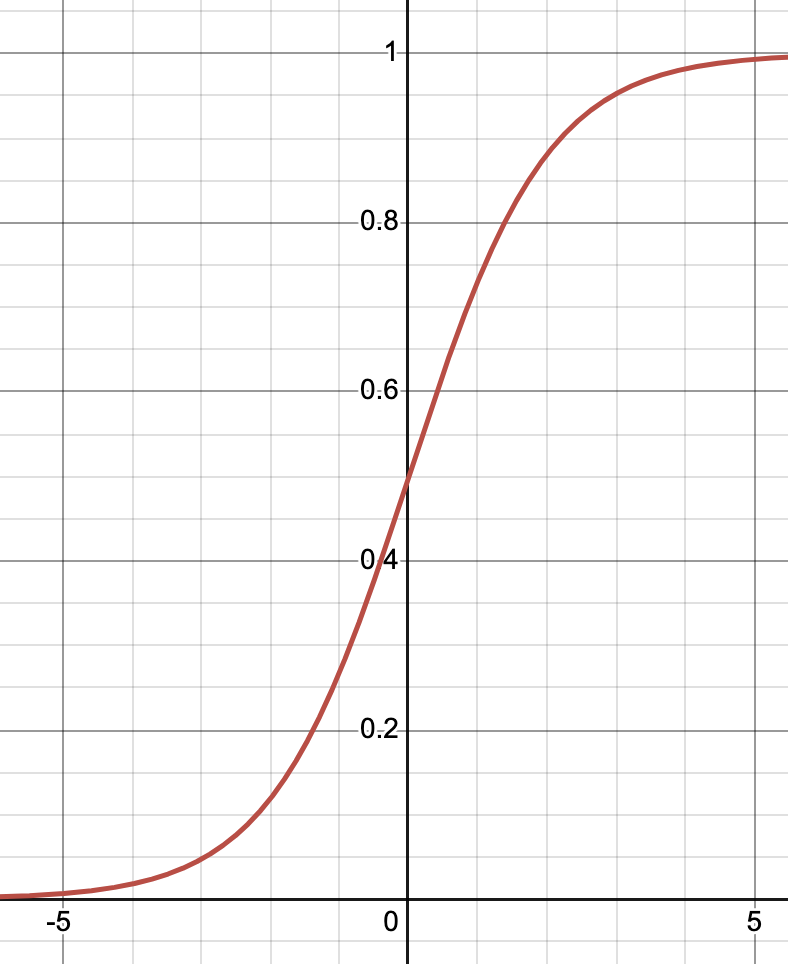
</div>

**Mathematically:**

$$
f(x) = \frac{1}{1+e^{-x}}
$$

**> the sum of the outputs of a sigmoid function can be over 1, which can't be thought of as probability.**

**In this case, we need Softmax function to make the sum of the outputs 1.**

# **Tanh**

**Tanh function is similar to Sigmoid function because the range of its ouput is -1 to 1 (-1, 1)**

<div>
  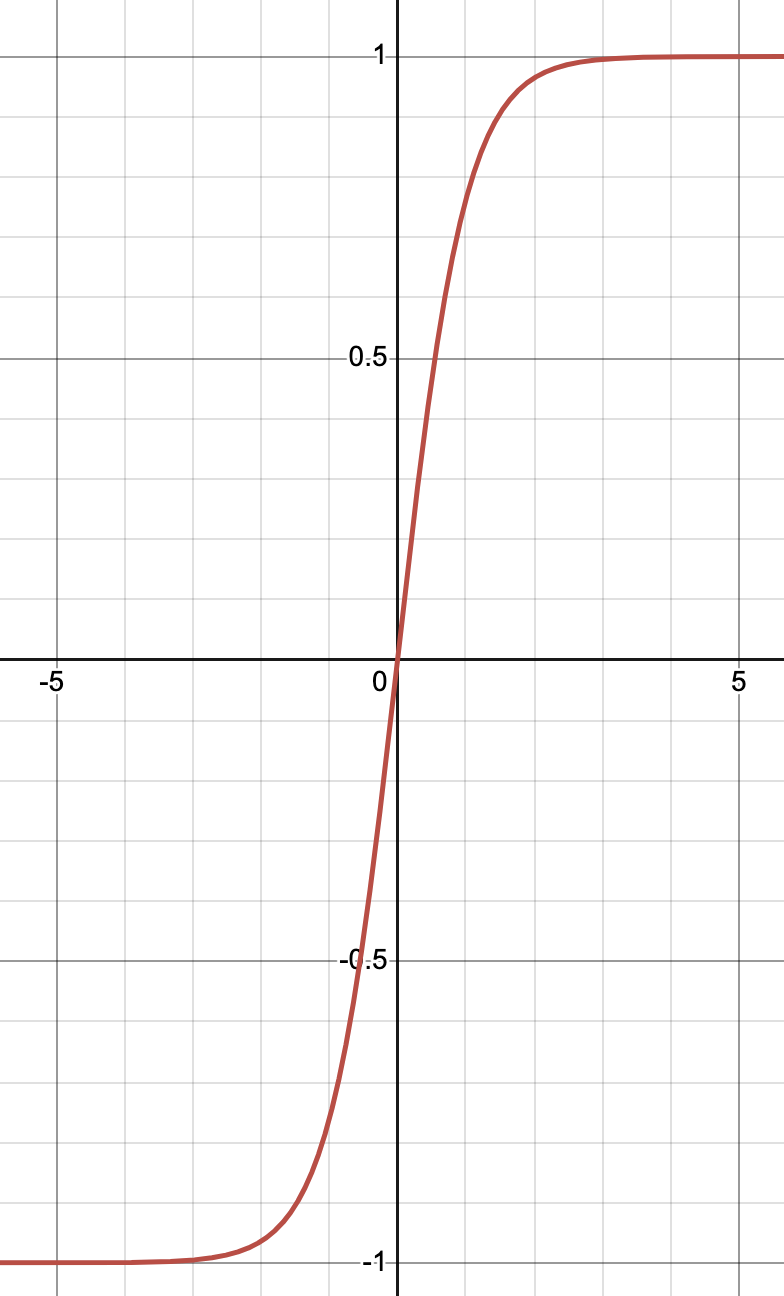
</div>

**Mathematically:**

$$
f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

# **ReLU**

**ReLU function makes the neurons be deactivated if the output of the linear transformation is less than 0.**

<div>
  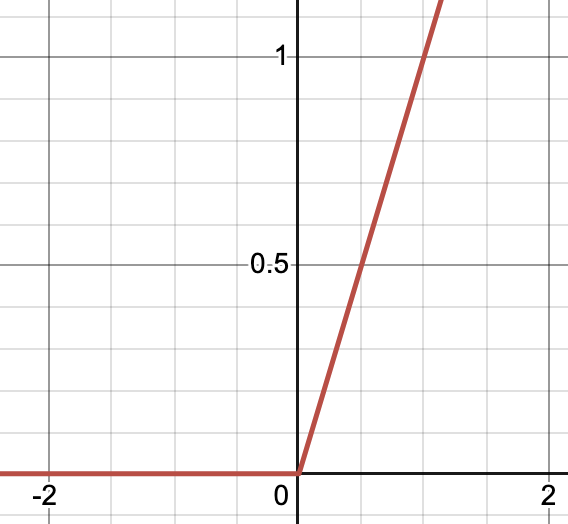
</div>

**Mathematically:**

$$
f(x) = max(0, x)
$$

**The negative side of the graph makes the gradient value zero.**

**Due to this reason, during the backpropagation process, the weights and biases for some neurons are not updated.**

# **Leaky ReLU**

**Leaky ReLU is an improved version of ReLU function to solve the Dying ReLU problem as it has a small positive slope in the negative area.**

<div>
  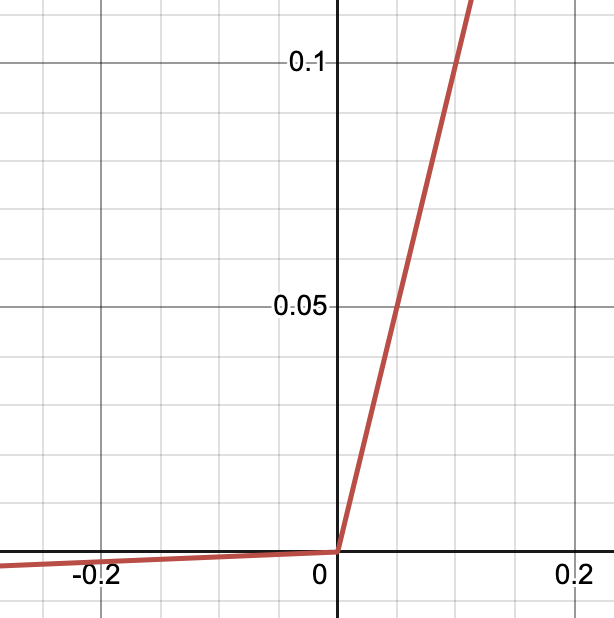
</div>

**Mathematically:**

$$
f(x) = max(0.01x,x)
$$

# **MNIST with Softmax**

**MNIST databaset is a large database of handwritten digits that is commonly used for training various image processing systems.**

**Let's try printing the images using pyplot.**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


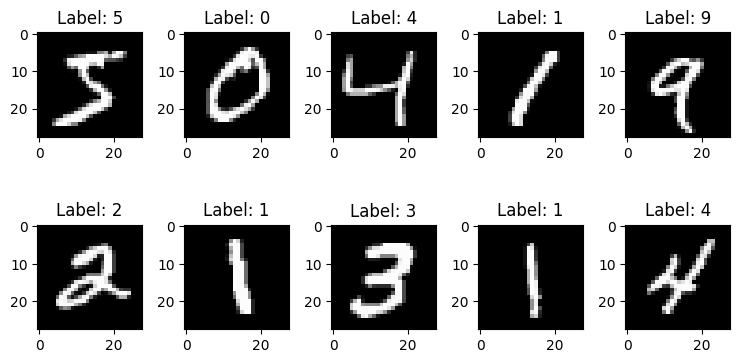

In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

**As you can see, the images are about handwriting numbers.**


**First, let's train with a simple linear regression using the softmax function**

In [ ]:
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=784, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

predictions = tf.model.predict(x_test)
print('Prediction: \n', predictions)
x_train
score = tf.model.evaluate(x_train, y_train)
print('Accuracy: ', score[1])

**This model's accuracy is 93%**

**Now, we are going to use a neural network and compare accuracy.**

# **MNIST with NN**

**Load the train set and test set**

In [ ]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

**Make a neural network with a hidden layer**

In [ ]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

**Train the model and predict test set**

In [ ]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

**The accuracy of this model with NN is 96%, which is better than the simple linear regression.**

**However, the loss is still little bit high.**

# **MNIST with Xavier**

**We learned that we can reduce the loss with Initializing neural networks.**

**Common initialization machine learning engineers use is Xavier initialization, which initialize weights.**

In [ ]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()

**Make a NN with Xavier initialization**

In [ ]:
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

**Train the model and see what happens!**

In [ ]:
history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

**This model has an 97% accuracy , which is very good, and 17% of loss, which is better than a non-initialized model.**

# **MNIST with Deep NN**

**What if the network is deeper and wider?**

In [ ]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

**Put more hidden layers**

In [ ]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

**Train the model and check its loss and accuracy**

In [ ]:
history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

**Its accuracy is 97%, which is the same as NN but the loss is 13%, which is better than the normal NN.**

# **MNIST with Dropout**

**Dropout means dropping out the nodes (input and hidden layer) in a neural network.**

**Dropout is usually used to solve the overfitting problem by randomly dropping a few nodes, it forces the layers to take more or less responsibility for the input by taking a probabilistic approach.**

<div>
  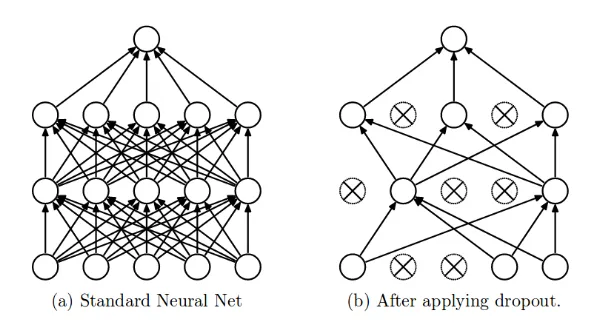
</div>

reference: https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9

**Let's combine deep NN and dropout method.**

In [ ]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10
drop_rate = 0.3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

**Dropping out the input and hidden layers**

In [ ]:
tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

**Train the model and evaluate loss and accuracy**

In [ ]:
history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

**The accuracy is 97% and the loss 11%. This is the best model so far!**